## Kriging example
after [an exercise](http://www.imm.dtu.dk/~alan/krexample.pdf) by Allan Aasbjerg Nielsen.

Here we are trying to estimate the value of $Z_0$ using the observations ${Z_1, Z_2, Z_3}$

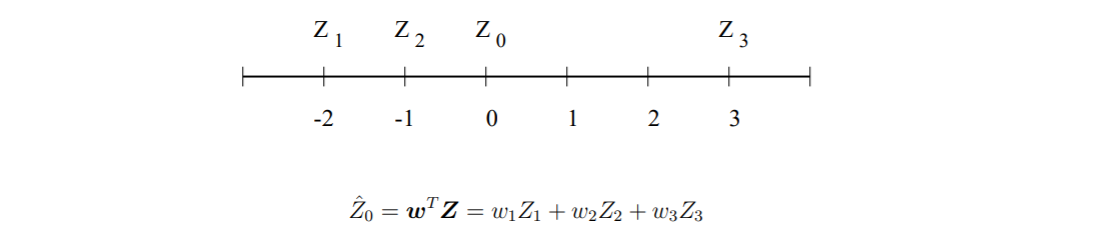

What weights $w_i$ should we assign to the three observations to get the *optimal* estimate for $Z_0$ in terms of ${Z_1, Z_2, Z_3}$?

To determine this, we'll need a model of how the dependence of the observations varies with distance.  

$\hat{\gamma}(h)=\left\{\begin{array}{ll}{0} & {h=0} \\ {C_{0}+C_{1}\left(\frac{3}{2} \frac{h}{R}-\frac{1}{2}\left(\frac{h}{R}\right)^{3}\right)} & {0<h<R} \\ {C_{0}+C_{1}} & {R \leq h}\end{array}\right.$

This is a **spherical model** with nugget effect $C_0$. For this problem, we will take range parameter $R = 6$, nugget effect $C_0 = 0$ and sill parameter $C_1 = 1$.

We can throw together something in Python to calculate a table of these values for the distances we will require. 

In [1]:
from sympy import *

init_printing()

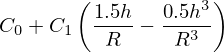

In [12]:
C_0, C_1, h, R = symbols('C_0 C_1 h R')

C_0 + C_1*((3/2)*(h/R) - (1/2)*(h/R)**3)

`sympy` makes a few adjustments to the formula, but it is basically the same.
Since we know this form matches the definition, we can use it in a function to calculate the spherical.

In [13]:
def sph(h, C_0=0, C_1=1, R=1):
    return C_0 + C_1*((3/2)*(h/R) - (1/2)*(h/R)**3)

In [14]:
sph(2,R=6)

In [18]:
{h: sph(h, R=6) for h in range(7)}

Proof of BLUE estimator:

$\begin{aligned} \sigma_{E}^{2} &=E\left\{\left(Z_{0}(\boldsymbol{r})-\hat{Z}_{0}(\boldsymbol{r})\right)^{2}\right\} \\ &=V\left\{Z_{0}(\boldsymbol{r})-\hat{Z}_{0}(\boldsymbol{r})\right\} \end{aligned}$

With $\sigma_{E}^{2}$ written as a variance, we can apply a property of the variance to find a more useful form of the expression.

First some assignments:

$\begin{aligned} D\{\boldsymbol{Z}\} &=\left[\begin{array}{ccc}{V\left\{Z_{1}\right\}} & {\cdots} & {C\left\{Z_{1}, Z_{N}\right\}} \\ {\vdots} & {} & {\vdots} \\ {C\left\{Z_{N}, Z_{1}\right\}} & {\cdots} & {V\left\{Z_{N}\right\}}\end{array}\right]  \\ &=\left[\begin{array}{ccc}{C_{11}} & {\cdots} & {C_{1 N}} \\ {\vdots} & {} & {\vdots} \\ {C_{N 1}} & {\cdots} & {C_{N N}}\end{array}\right] \\ &=\boldsymbol{C} \\ C\left\{Z, Z_{0}(\boldsymbol{r})\right\} &=\left[\begin{array}{c}{{C\left\{Z_{1}, Z_{0}(\boldsymbol{r})\right\}}} \\ {\vdots} \\ {C\left\{Z_{N}, Z_{0}(\boldsymbol{r})\right\}}\end{array}\right]=\left[\begin{array}{c}{C_{10}} \\ {\vdots} \\ {C_{N 0}}\end{array}\right] \\ &=\boldsymbol{D} \end{aligned}$

Variance of a difference can be rewritten as: 

$\operatorname{Var}[X-Y]=\operatorname{Var}[X]+\operatorname{Var}[Y]-2 \operatorname{Cov}[X, Y]$

Our two terms $X$ and $Y$ are the estimated value $\hat{Z}_{0}(r)$ and the true value ${Z}_{0}(r)$. This formula tells us that the variance of their difference will be the variance of $\hat{Z}_{0}(r)$ plus the variance of ${Z}_{0}(r)$ minus twice the covariance of $\hat{Z}_{0}(r), {Z}_{0}(r)$

In matrix form, this is represented as:

$\sigma_{E}^{2}=C_{00}+\boldsymbol{w}^{T} \boldsymbol{C} \boldsymbol{w}-2 \boldsymbol{w}^{T} \boldsymbol{D}$

This will be a scalar quantity. The objective of the kriging , when we say **best** linear unbiased estimator, this means the linear unbiased estimator with minimum variance.

